## Copy of code for numerical data and regression from prev lab :)

In [158]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [159]:
df=pd.read_csv('https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/labs/python_lab_2901/marketing_customer_analysis_clean.csv')
#separating numericals from the original dataset
df_numerical=df.select_dtypes(include='number')
df_numerical=df_numerical.drop("unnamed:_0", axis=1)
df_numerical
X=df_numerical[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception","number_of_open_complaints", "number_of_policies", "month"]]
y=df_numerical[["total_claim_amount"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
pt.fit(X_train)

X_train=pd.DataFrame(pt.transform(X_train))

df_numerical.columns

X_train=X_train.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

X_test=pd.DataFrame(pt.transform(X_test))

X_test=X_test.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)

y_pred=pd.DataFrame(model.predict(X_test))
y_test=y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
MSE=mse(y_test, y_pred)
MAE=mae(y_test, y_pred)
RMSE=mse(y_test, y_pred, squared=False)

## Calculating R2_score for the model based only on numericals

In [160]:
from sklearn.metrics import r2_score

In [161]:
#calculating r2_score for test set
r2_score(y_test,y_pred)

0.4496112658742951

In [162]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.42061844452491715

## CREATING MODEL FOR ALL VARIABLES

## Combining numericals and categoricals

### old code from prev lab to get all encoded

In [163]:
#getting the object columns into categorical df to devide them into the nominals and ordinals
df_category=df.select_dtypes(include='object')

#deviding df_category; separating nominals
df_category_nominals=df_category[['state','response', 'employmentstatus','gender', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel',"vehicle_class", "vehicle_type"]]

#transforming nominals for ML
df_category_nominals=pd.get_dummies(df_category_nominals, dtype=int)

#deviding df_category; separating ordinals
df_category_ordinals=df_category[['coverage', 'education',"vehicle_size"]]

#maping ordinals
df_category_ordinals['education'].unique()
df_category_ordinals['education']=df_category_ordinals['education'].map({"High School or Below": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5})

df_category_ordinals['vehicle_size'].unique()
df_category_ordinals['vehicle_size']=df_category_ordinals['vehicle_size'].map({'Small': 1, 'Medsize': 2, 'Large': 3})

df_category_ordinals['coverage'].unique()
df_category_ordinals['coverage']=df_category_ordinals['coverage'].map({'Basic': 1, 'Extended': 2, 'Premium': 3})

df_category=pd.concat([df_category_nominals, df_category_ordinals], axis=1)
df_category

df_numerical=df.select_dtypes(include='number')
df_numerical=df_numerical.drop("unnamed:_0", axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_15460\729644646.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category_ordinals['education']=df_category_ordinals['education'].map({"High School or Below": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5})
C:\Users\user\AppData\Local\Temp\ipykernel_15460\729644646.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category_ordinals['vehicle_size']=df_category_ordinals['vehicle_size'].map({'Small': 1, 'Medsize': 2, 'Large': 3})
C:\Users\user\

## concat of mericals and categoricals

In [164]:
df_full=pd.concat([df_numerical, df_category], axis=1)
df_full

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,state_Arizona,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,coverage,education,vehicle_size
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,1,...,1,0,0,0,0,0,1,1,2,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0,...,1,0,0,0,0,0,1,1,2,2
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0,...,0,0,0,1,0,0,1,1,3,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,0,...,1,0,0,0,0,0,1,2,2,2
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0,...,1,0,0,0,0,0,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0,...,0,1,0,0,0,0,1,3,3,2
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0,...,1,0,0,0,0,0,1,1,2,2
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1,...,0,0,1,0,0,0,1,2,3,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0,...,0,0,0,1,0,0,1,3,2,2


## X-Y split

In [165]:
#defining X and y

X=df_full.drop("total_claim_amount", axis=1)
y=df_full[["total_claim_amount"]]

In [166]:
#spliting X and y
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

## Scaling

In [167]:
#scaling everything with powertransformation for X_train
pt=PowerTransformer()
pt.fit(X_train)
X_train=pt.transform(X_train)

In [168]:
#scaling everything with powertransformation for X_test with fit from X_train
X_test=pt.transform(X_test)

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

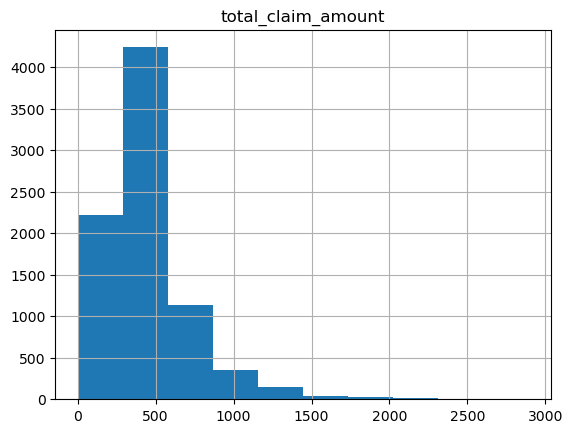

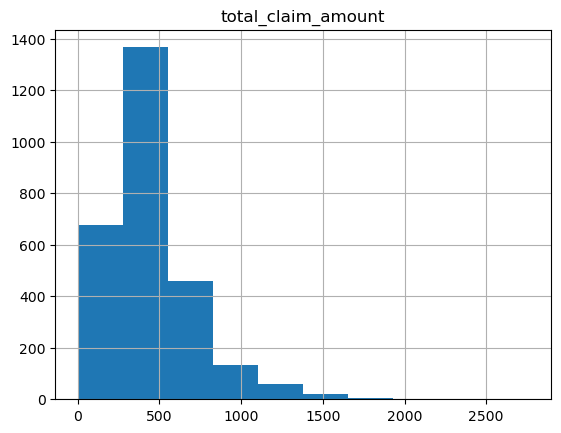

In [169]:
#checking distribution of y
y_train.hist()
y_test.hist()

#has ight scew but checking without transformation

## Model creating

In [170]:
lr=LinearRegression()

In [171]:
#training the model
model_full=lr.fit(X_train,y_train)
print("model_coefficients:", model_full.coef_)
print("model_intercept:",model_full.intercept_)

model_coefficients: [[ 6.12704415e+00 -1.88102507e+01  8.46582039e+01  4.28812789e+00
   1.34895854e-01 -1.52584574e+00 -2.42299539e+00 -4.88919173e-02
   5.12695113e+13  6.52814537e+13  3.85353801e+13  5.97033095e+13
   3.73318359e+13 -3.77444075e+11 -3.77444075e+11  5.85264666e+13
   1.34302386e+14  5.91741741e+13  4.69765497e+13  1.20626620e+14
  -1.00959425e+14 -1.00959425e+14 -1.78003376e+14 -2.17823769e+14
  -1.72328602e+14 -5.23978486e+13 -7.21546320e+13 -6.48188232e+13
   1.61321730e+13  2.01015976e+13  2.63076319e+13  2.83903054e+13
   3.48908193e+13  4.01634861e+13  7.24151625e+12  1.09674170e+13
   9.83565033e+12 -2.44619396e+14 -2.31700683e+14 -1.82372107e+14
  -1.54597509e+14  3.75687373e+13  3.46421254e+13  3.08924884e+13
   2.75072340e+13 -2.65849243e+13 -6.90850516e+12 -7.39886716e+12
  -2.06393954e+13 -1.17689556e+13 -2.11836864e+13  0.00000000e+00
   2.09580078e+01 -4.34960938e+00 -6.72363281e-01]]
model_intercept: [434.5978312]


<Axes: xlabel='coeff', ylabel='name'>

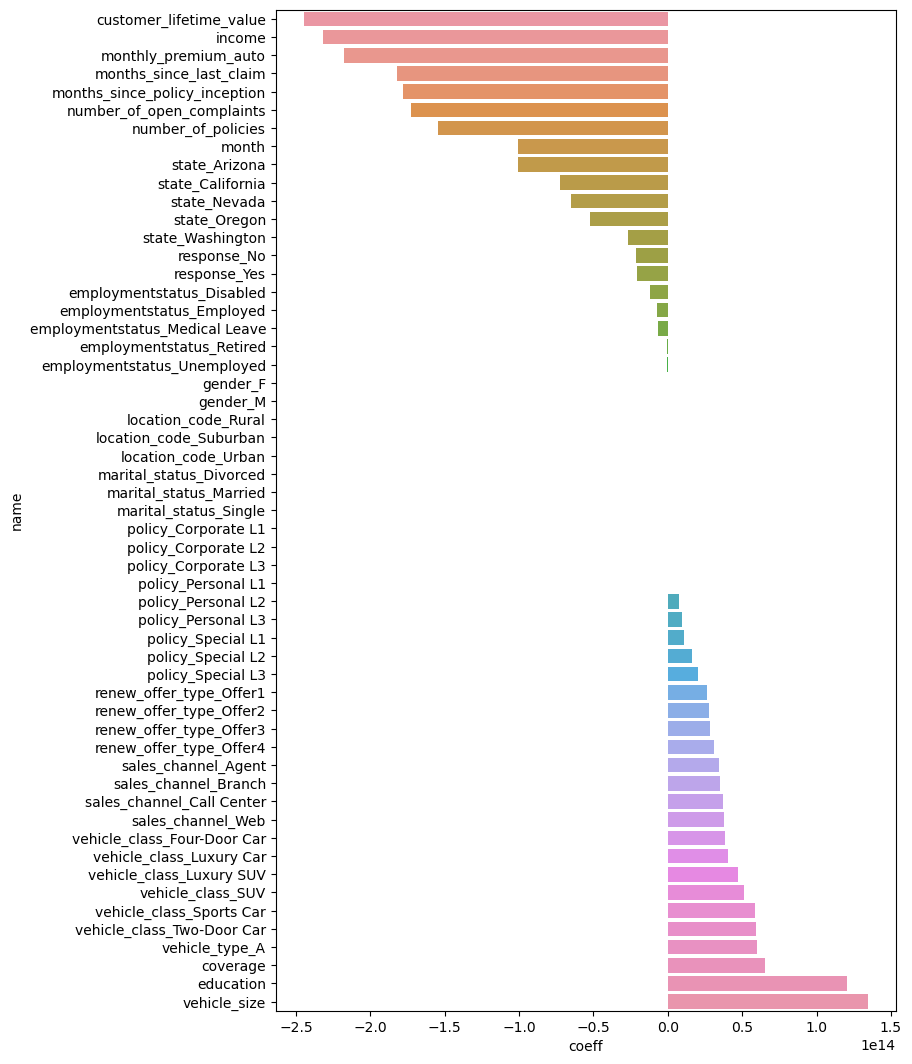

In [172]:
#visualizing
feature_names1=list(X.columns)
coefficients1 = model_full.coef_
coefficients1=[i for i in coefficients1[0]]
coefficients1=sorted(coefficients1)
fi_dict1 = {"name":feature_names1,"coeff":coefficients1}
fi_df1 = pd.DataFrame(fi_dict1)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 13))
sn.barplot(y = fi_df1["name"],x =fi_df1["coeff"])

In [173]:
#testing model
y_pred=pd.DataFrame(lr.predict(X_test))

In [174]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
MAE_full=mae(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nmae_full: {MAE_full}\nRMSE:{RMSE_full}")

mse_full:21538.71679060425
mae_full: 100.96278689489496
RMSE:146.760746763582


## R2 calculating

In [175]:
#calculating R2 for predictions
r2_test=r2_score(y_test,y_pred)
r2_test

0.7408420741787296

In [176]:
#calculating R2 for train set

#creating predictions from the train set
y_train_pred=pd.DataFrame(lr.predict(X_train))

#calculating R2
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.7385177338649123

In [177]:
diff_r2=round(r2_test/r2_train*100, 2)
diff_r2

100.31

## Linear Regression

In [100]:
# that's with alpha=0
#created in week 4


## Lasso

In [116]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso: Train -> 0.7349913322010659, Test -> 0.7400718447089474


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.336e+07, tolerance: 7.046e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [117]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.1)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7349861749173376, Test -> 0.7401724512497658


In [118]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=1)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7345519997863388, Test -> 0.7408224260774897


In [119]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=1000)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.0, Test -> -1.5086713635703575e-05


## Ridge

In [123]:
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7226271044070653, Test -> 0.7282617733723092


In [125]:
model=Ridge(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7349913321612844, Test -> 0.7400720966751595


In [126]:
model=Ridge(alpha=1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7349913282244661, Test -> 0.7400743613730308


In [127]:
model=Ridge(alpha=1000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7319971416681754, Test -> 0.7396138056620583


# 2. Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.

In [179]:
def model_check(alpha_, X_train, y_train, X_test, y_test):
    #Lasso
    from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
    model_l=Lasso(alpha=alpha_)
    model_l.fit(X_train, y_train)
    print(f"{model_l.__class__.__name__}: Train -> {model_l.score(X_train, y_train)}, Test -> {model_l.score(X_test, y_test)}")
    
    #Ridge
    model_r=Ridge(alpha=alpha_)
    model_r.fit(X_train, y_train)
    print(f"{model_r.__class__.__name__}: Train -> {model_r.score(X_train, y_train)}, Test -> {model_r.score(X_test, y_test)}")

In [180]:
model_check(10, X_train, y_train, X_test, y_test)

Lasso: Train -> 0.7277827600831146, Test -> 0.7343921553986126
Ridge: Train -> 0.7385210054758051, Test -> 0.7408820212373883


# 3. Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with (if necessary)

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 10, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features

Columns_new=X.columns
X_train=pd.DataFrame(X_train)
X_train.columns=Columns_new
X_test=pd.DataFrame(X_test)
X_train.columns=Columns_new
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train_RFE = selector.transform(X_train)
X_test_RFE  = selector.transform(X_test)

X_train_RFE = pd.DataFrame(X_train, columns=kept_features)
X_test_RFE  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train_RFE)

Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 fe

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car
0,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,1.283370,-0.617572,-0.497249,-0.416595,-1.063879
1,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,-0.779198,1.619246,-0.497249,-0.416595,-1.063879
2,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,1.283370,-0.617572,-0.497249,-0.416595,0.939956
3,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,1.283370,-0.617572,-0.497249,-0.416595,-1.063879
4,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,-0.779198,-0.617572,2.011067,-0.416595,0.939956
...,...,...,...,...,...,...,...,...,...,...
8177,-0.462738,-0.78224,-0.314865,1.645386,-0.302996,-0.779198,1.619246,-0.497249,-0.416595,0.939956
8178,-0.462738,-0.78224,-0.314865,1.645386,-0.302996,-0.779198,1.619246,-0.497249,-0.416595,-1.063879
8179,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,-0.779198,-0.617572,-0.497249,2.400413,0.939956
8180,-0.462738,1.27838,-0.314865,-0.607760,-0.302996,-0.779198,-0.617572,2.011067,-0.416595,0.939956


In [182]:
#P-Value Using func
def feature_selection_pvalue(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues[1:]  # Exclude the constant term
    selected_features = X.columns[1:][p_values < significance_level]
    return selected_features

# Use case:
selected_features_pvalue = feature_selection_pvalue(X_train, y_train)
# Print or display the selected features
print("Selected Features based on P-value:")
print(selected_features_pvalue)

ValueError: The indices for endog and exog are not aligned

In [156]:
Columns_new

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'month',
       'state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon',
       'state_Washington', 'response_No', 'response_Yes',
       'employmentstatus_Disabled', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type